# Section 6: Gradient descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

## Gradient descent in 1D

In [2]:
def fx(x_param):
    return 3 * x_param ** 2 - 3 * x_param + 4

def df(x_param):
    return 6 * x_param - 3

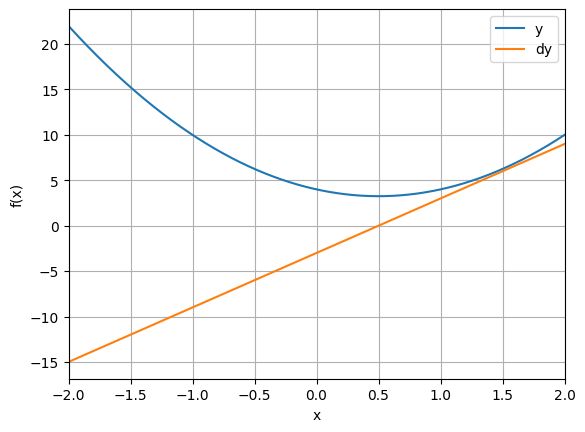

In [3]:
x = np.linspace(-2, 2, 2001)

plt.plot(x, fx(x))
plt.plot(x, df(x))
plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y', 'dy'])
plt.show()

In [4]:
local_min = np.random.choice(x, 1)
learning_rate = .01
training_epochs = 100

print(local_min)

for i in range(training_epochs):
    grad = df(local_min)
    local_min -= learning_rate * grad
    
print(local_min)

[-0.262]
[0.49843419]


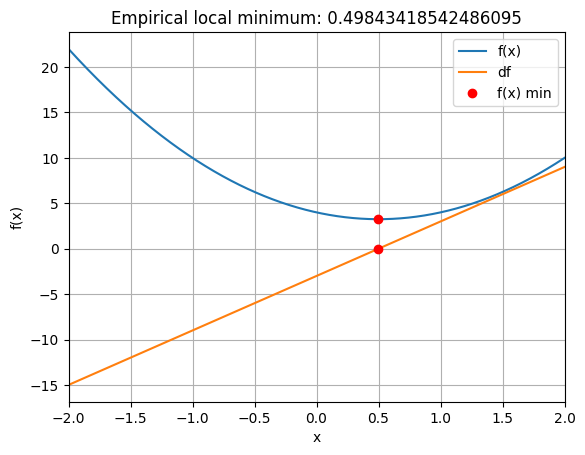

In [5]:
plt.plot(x, fx(x))
plt.plot(x, df(x))
plt.plot(local_min, fx(local_min), 'ro')
plt.plot(local_min, df(local_min), 'ro')
plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)', 'df', 'f(x) min'])
plt.title("Empirical local minimum: %s" %local_min[0])
plt.show()

In [6]:
local_min = np.random.choice(x, 1).item()
learning_rate = .01
training_epochs = 100
model_params = np.zeros((training_epochs, 2))

for i in range(training_epochs):
    grad = df(local_min)
    local_min -= learning_rate * grad
    model_params[i, :] = local_min, grad

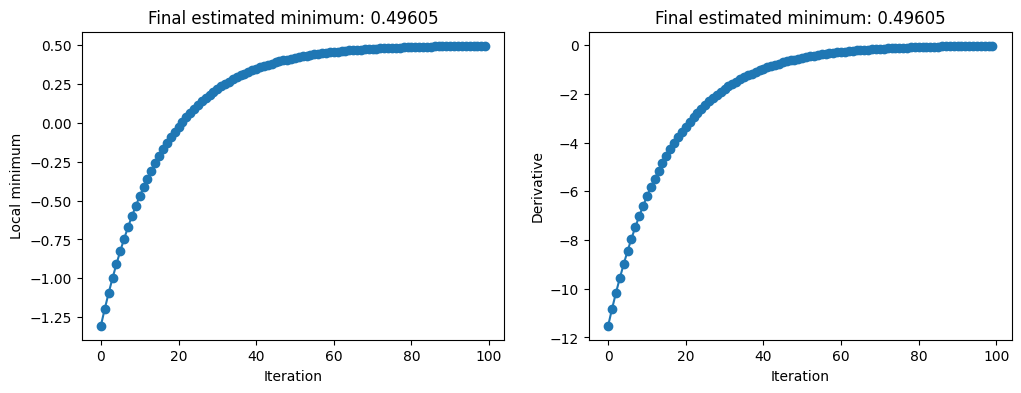

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for i in range(2):
    ax[i].plot(model_params[:, i], 'o-')
    ax[i].set_xlabel('Iteration')
    ax[i].set_title(f"Final estimated minimum: {local_min:.5f}")
    
ax[0].set_ylabel("Local minimum")
ax[1].set_ylabel('Derivative')
plt.show()

In [8]:
local_min = np.random.choice(x, 1).item()
learning_rate = .01
model_params = np.empty((0, 2))
i = 0
threshold = 0.1

while True:
    grad = df(local_min)
    local_min -= learning_rate * grad
    new_row = np.array([[local_min, grad]])
    model_params = np.vstack([model_params, new_row])
    i += 1

    if abs(grad) < threshold:
        break
    
print(model_params)

[[0.75192    1.608     ]
 [0.7368048  1.51152   ]
 [0.72259651 1.4208288 ]
 [0.70924072 1.33557907]
 [0.69668628 1.25544433]
 [0.6848851  1.18011767]
 [0.673792   1.10931061]
 [0.66336448 1.04275197]
 [0.65356261 0.98018685]
 [0.64434885 0.92137564]
 [0.63568792 0.8660931 ]
 [0.62754664 0.81412752]
 [0.61989385 0.76527987]
 [0.61270021 0.71936307]
 [0.6059382  0.67620129]
 [0.59958191 0.63562921]
 [0.593607   0.59749146]
 [0.58799058 0.56164197]
 [0.58271114 0.52794345]
 [0.57774847 0.49626685]
 [0.57308356 0.46649084]
 [0.56869855 0.43850139]
 [0.56457664 0.4121913 ]
 [0.56070204 0.38745982]
 [0.55705992 0.36421223]
 [0.55363632 0.3423595 ]
 [0.55041814 0.32181793]
 [0.54739305 0.30250885]
 [0.54454947 0.28435832]
 [0.5418765  0.26729682]
 [0.53936391 0.25125901]
 [0.53700208 0.23618347]
 [0.53478195 0.22201247]
 [0.53269504 0.20869172]
 [0.53073333 0.19617021]
 [0.52888933 0.1844    ]
 [0.52715597 0.173336  ]
 [0.52552662 0.16293584]
 [0.52399502 0.15315969]
 [0.52255532 0.14397011]


## CodeChallenge: unfortunate starting value

In [9]:
def fx(x_param):
    return np.cos(2 * np.pi * x_param) + x_param ** 2

def df(x_param):
    return -2 * np.pi * np.sin(2 * np.pi * x_param) + 2 * x_param 

In [10]:
x = np.linspace(-2, 2, 2001)
local_min = np.random.choice(x, 1)
learning_rate = .01
training_epochs = 100

print(local_min)

for i in range(training_epochs):
    grad = df(local_min)
    local_min -= learning_rate * grad
    
print(local_min)

[1.482]
[1.42506741]


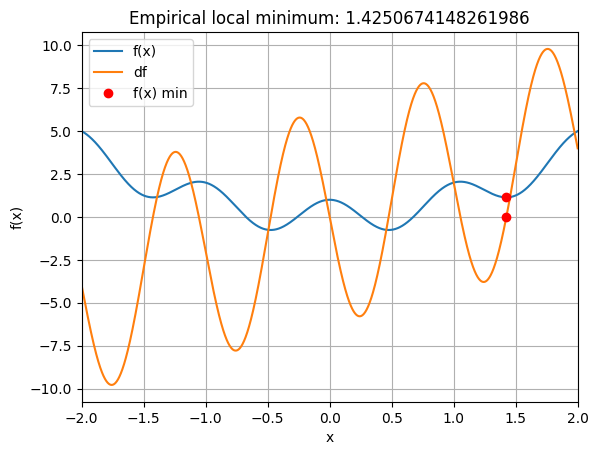

In [11]:
plt.plot(x, fx(x))
plt.plot(x, df(x))
plt.plot(local_min, fx(local_min), 'ro')
plt.plot(local_min, df(local_min), 'ro')
plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)', 'df', 'f(x) min'])
plt.title("Empirical local minimum: %s" %local_min[0])
plt.show()

## Gradient descent in 2D

In [12]:
def fxy(x_param, y_param):
    xx, yy = np.meshgrid(x_param, y_param)
    zz = 3 * (1 - xx) ** 2 * np.exp(-xx ** 2 - (yy + 1) ** 2) \
        - 10 * (xx / 5 - x ** 3 - yy ** 5) * np.exp(-xx ** 2 - yy ** 2) \
        - (1 / 3) * np.exp(-(xx + 1) ** 2 - yy ** 2)
    
    return zz

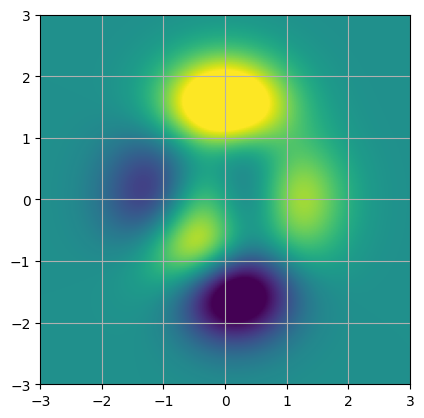

In [13]:
x = np.linspace(-3, 3, 201)
y = np.linspace(-3, 3, 201)
z = fxy(x, y)

plt.imshow(z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.grid()
plt.show()

In [14]:
sx, sy = sym.symbols('sx, sy')
sz = 3 * (1 - sx) ** 2 * sym.exp(-sx ** 2 - (sy + 1) ** 2) \
    - 10 * (sx / 5 - sx ** 3 - sy ** 5) * sym.exp(-sx ** 2 - sy ** 2) \
    - (1 / 3) * sym.exp(-(sx + 1) ** 2 - sy ** 2)

df_x = sym.lambdify((sx, sy), sym.diff(sz, sx), 'sympy')
df_y = sym.lambdify((sx, sy), sym.diff(sz, sy), 'sympy')

In [15]:
local_min = np.random.rand(2) * 4 - 2
starting_point = local_min[:]
learning_rate = .01
training_epochs = 1000
trajectory = np.zeros((training_epochs, 2))

for i in range(training_epochs):
    grad = np.array([
        df_x(local_min[0], local_min[1]).evalf(),
        df_y(local_min[0], local_min[1]).evalf()
    ])
    local_min = local_min - learning_rate * grad
    trajectory[i, :] = local_min
    
print(starting_point)
print(local_min)

[-1.66304287  0.02668122]
[-1.34739624436821 0.204518866097005]


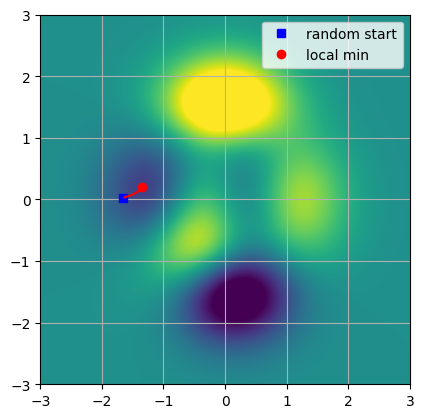

In [16]:
plt.imshow(z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.plot(starting_point[0], starting_point[1], 'bs')
plt.plot(local_min[0], local_min[1], 'ro')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'r')
plt.legend(["random start", "local min"])
plt.grid()
plt.show()

## CodeChallenge: 2D gradient ascent

In [17]:
local_max = np.random.rand(2) * 4 - 2
starting_point = local_max[:]
learning_rate = .01
training_epochs = 1000
trajectory = np.zeros((training_epochs, 2))

for i in range(training_epochs):
    grad = np.array([
        df_x(local_max[0], local_max[1]).evalf(),
        df_y(local_max[0], local_max[1]).evalf()
    ])
    local_max = local_max + learning_rate * grad
    trajectory[i, :] = local_max
    
print(starting_point)
print(local_max)

[1.98294703 0.39020542]
[1.28568469724130 -0.00484755907559365]


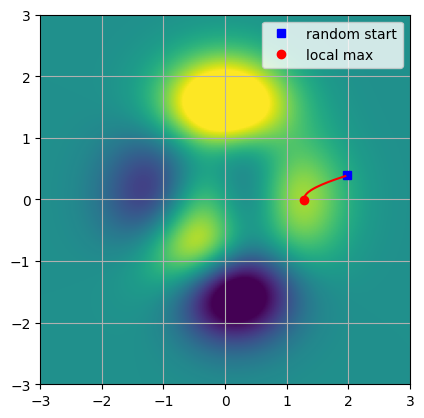

In [18]:
plt.imshow(z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.plot(starting_point[0], starting_point[1], 'bs')
plt.plot(local_max[0], local_max[1], 'ro')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'r')
plt.legend(["random start", "local max"])
plt.grid()
plt.show()

## Parametric experiments on gradient descent

In [19]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 401)

def fx(x_param):
    return np.sin(x_param) * np.exp(-x_param ** 2 * .05)

def df(x_param):
    return np.cos(x_param) * np.exp(-x_param ** 2 * .05) + np.sin(x_param) * np.exp(-x_param ** 2 * .05) * (-.1 * x_param)

In [20]:
local_min = np.random.choice(x, 1)
learning_rate = .01
training_epochs = 1000

print(local_min)

for i in range(training_epochs):
    grad = df(local_min)
    local_min -= learning_rate * grad
    
print(local_min)

[2.29336264]
[4.29109239]


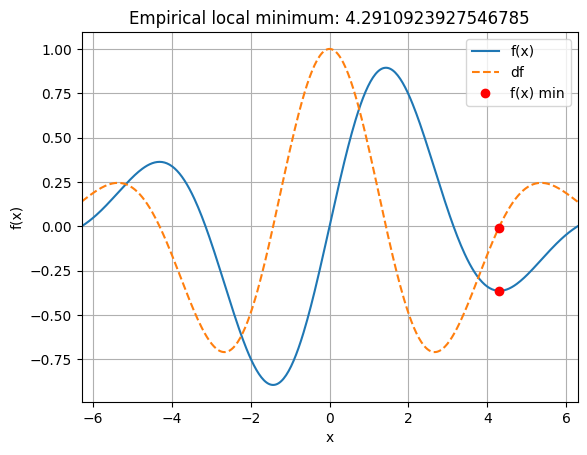

In [21]:
plt.plot(x, fx(x))
plt.plot(x, df(x), '--')
plt.plot(local_min, fx(local_min), 'ro')
plt.plot(local_min, df(local_min), 'ro')
plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)', 'df', 'f(x) min'])
plt.title("Empirical local minimum: %s" %local_min[0])
plt.show()

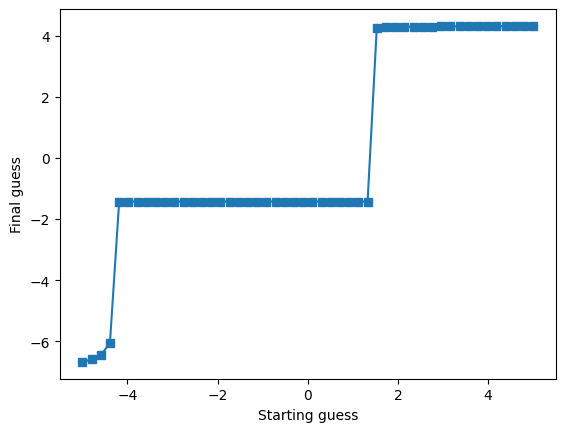

In [22]:
starting_locations = np.linspace(-5, 5, 50)
final_results = np.zeros(len(starting_locations))

for idx, local_min in enumerate(starting_locations):
    for i in range(training_epochs):
        grad = df(local_min)
        local_min -= learning_rate * grad
        
    final_results[idx] = local_min
    
plt.plot(starting_locations, final_results, 's-')
plt.xlabel("Starting guess")
plt.ylabel("Final guess")
plt.show()

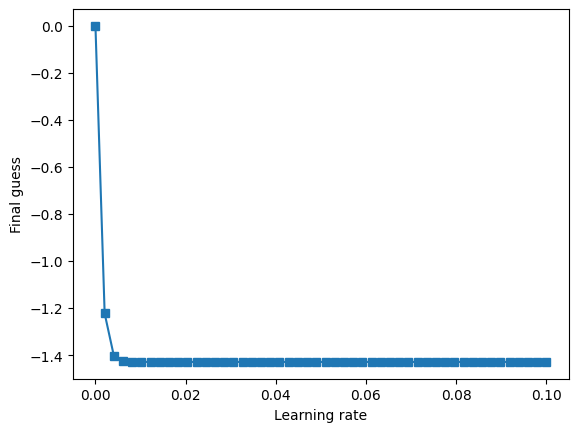

In [23]:
learning_rates = np.linspace(1e-10, 1e-1, 50)
final_results = np.zeros(len(learning_rates))

for idx, learning_rate in enumerate(learning_rates):
    local_min = 0
    
    for i in range(training_epochs):
        grad = df(local_min)
        local_min -= learning_rate * grad
        
    final_results[idx] = local_min
    
plt.plot(learning_rates, final_results, 's-')
plt.xlabel("Learning rate")
plt.ylabel("Final guess")
plt.show()

In [24]:
learning_rates = np.linspace(1e-10, 1e-1, 50)
training_epochs = np.round(np.linspace(10, 500, 40))
final_results = np.zeros((len(learning_rates), len(training_epochs)))

for l_idx, learning_rate in enumerate(learning_rates):
    for e_idx, training_epoch in enumerate(training_epochs):
        local_min = 0
        
        for i in range(int(training_epoch)):
            grad = df(local_min)
            local_min -= learning_rate * grad
            
        final_results[l_idx, e_idx] = local_min

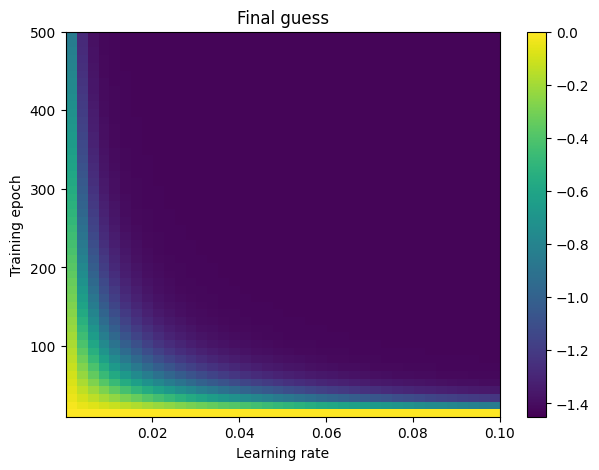

In [25]:
fig, ax = plt.subplots(figsize=(7, 5))

plt.imshow(final_results, extent=[learning_rates[0], learning_rates[-1], training_epochs[0], training_epochs[-1]], aspect='auto', origin='lower', vmin=-1.45, vmax=0)
plt.xlabel("Learning rate")
plt.ylabel("Training epoch")
plt.title("Final guess")
plt.colorbar()
plt.show()

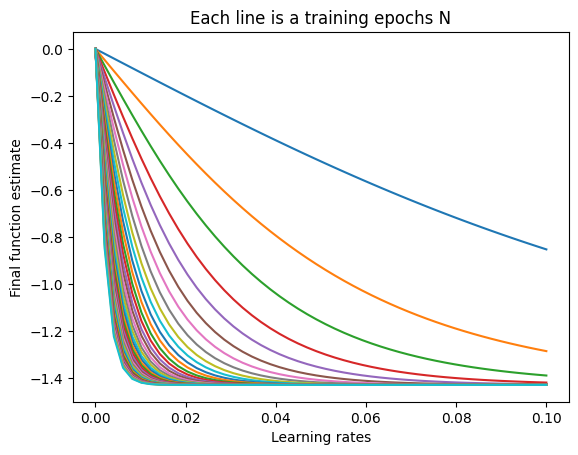

In [26]:
plt.plot(learning_rates, final_results)
plt.xlabel("Learning rates")
plt.ylabel("Final function estimate")
plt.title("Each line is a training epochs N")
plt.show()

## CodeChallenge: fixed vs. dynamic learning rate

In [27]:
def fx(x_param):
    return 3 * x_param ** 2 - 3 * x_param + 4

def df(x_param):
    return 6 * x_param - 3

In [28]:
x = np.linspace(-2, 2, 2001)
local_min = np.random.choice(x, 1)
base_learning_rate = .01
training_epochs = 50

print(local_min)

for i in range(training_epochs):
    grad = df(local_min)
    learning_rate = base_learning_rate * np.abs(grad)
    local_min -= learning_rate * grad
    
print(local_min)

[0.316]
[0.45829669]


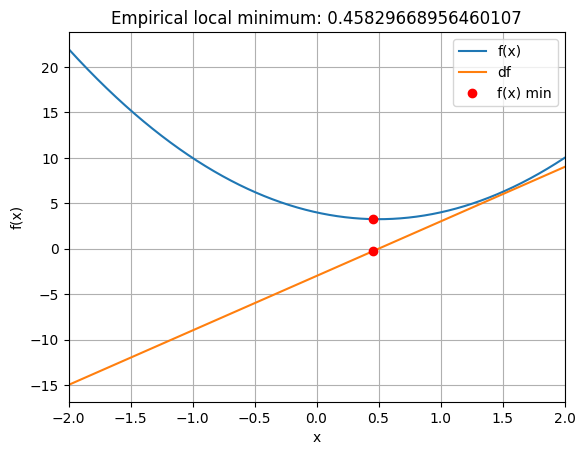

In [29]:
plt.plot(x, fx(x))
plt.plot(x, df(x))
plt.plot(local_min, fx(local_min), 'ro')
plt.plot(local_min, df(local_min), 'ro')
plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)', 'df', 'f(x) min'])
plt.title("Empirical local minimum: %s" %local_min[0])
plt.show()